QUESTIONS:

1. Why doesn't diabetes_scale work?
2. Should I have used diabetes_scale?
3. What hyperparameters are there for my model?
4. Train-test-split? Validation?
5. Should I move onto MLP?
6. How to plot good looking graphs?


Random ideas

* Explain perceptron from a different framework?
* Hardware required
* Combine methods (pipelining, preprocess -> SLP?. PCA -> SLP?)
* Features selection (variable importance weighing)
* SEPARATELY do the train-test-split for accuracy testing, and also FIT ALL DATA for showing perceptron cannot learn XOR
* cross-validation?
* looking at sklearn parameters
* * early stopping
* * keep best iter
* * L1/L2
* * initialized weights
* * regularization
---

Preliminary planning
* Abstract
* Problem - go through the diabetes data set problem.
* Related work (older + newer)
* History, algorithm, inability for XOR (is it relevant?), loss function
* Experiment
* Compare with other methods (tree-based, SVM, logistic regression, etc. everything relevant mentioned so far in lecture) using ablative study
* Conclusion
---

1. Introduction  
Nature of task (no need divulge into too much detail)
1.1 Related Work (History, newer developments)
1.2 Newer ways to use it (generalized perceptron learning etc.)
2. Methodology  
2.1 Pipeline, algorithm, diagram  
2.2 Loss function
2.3 Inference
2.4 Limitations
3. Comparison to other classification algorithms  
ablative study  
Improvements to the perceptron  
tree-based, SVM, logistic regression, etc. everything relevant mentioned so far in lecture
4. Conclusion
5. References

#### Preprocessing

In [1]:
# import dependencies
import numpy as np
import pandas as pd

file_path= 'diabetes_scale.txt'

# Read the data from the file
with open(file_path, 'r') as file:
    data = file.readlines()

# Create a DataFrame
col_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
df = pd.DataFrame([line.strip().split() for line in data], columns=["Outcome"] + col_names)

# Split each feature column into two columns: Feature ID and Feature Value
for col in col_names:
    feature_data = df[col].str.split(":", expand=True)
    df[col] = feature_data[1].astype(float)

df["Outcome"] = df["Outcome"].astype(int)
print(df.isnull().sum())
print(df.isna().sum())

df = df.dropna()

# Extract features and groundtruth columns
X = df.iloc[:,1:].values
y = df.iloc[:,0].values

Outcome                     0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         9
dtype: int64
Outcome                     0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         9
dtype: int64


In [2]:
df[:3]

,Outcome,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-1,-0.294118,0.487437,0.180328,-0.292929,-1.0,0.001490,-0.531170,-0.033333
1,1,-0.882353,-0.145729,0.081967,-0.414141,-1.0,-0.207153,-0.766866,-0.666667
2,-1,-0.058824,0.839196,0.049180,-1.000000,-1.0,-0.305514,-0.492741,-0.633333


### EDA

In [3]:
print(df.isnull().sum())
print(df.isna().sum())

Outcome                     0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64
Outcome                     0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64


In [4]:
df.describe()

,Outcome,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000
mean,0.306983,-0.553902,0.211976,0.130392,-0.584860,-0.812335,-0.046738,-0.664571,-0.599166
std,0.952343,0.393479,0.321448,0.317587,0.322290,0.273006,0.235680,0.282291,0.388652
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-0.882353,-0.005025,0.016393,-1.000000,-1.000000,-0.186289,-0.858668,-0.900000
50%,1.000000,-0.647059,0.165829,0.180328,-0.535354,-0.940898,-0.046200,-0.749787,-0.733333
75%,1.000000,-0.294118,0.407035,0.311475,-0.353535,-0.703310,0.087929,-0.532878,-0.366667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


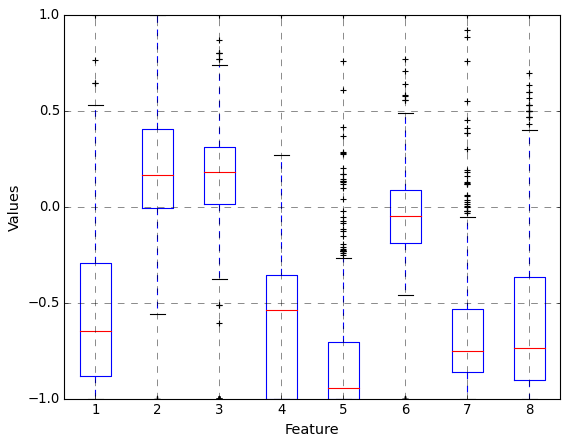

In [14]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_facecolor('white')

# stylize
plt.style.use('classic')
plt.grid(True, linestyle='--', alpha=0.8)

ax.boxplot(X)

ax.set_facecolor('white')
ax.set_xlabel('Feature', fontsize = 13)
ax.set_ylabel('Values', fontsize = 13)
ax.set_title('')

# Show the plot
plt.savefig('EDA.png')
plt.show()

### SLP

#### Below is the unpackaged code for explaining the pipeline

In [10]:
# Create a Perceptron model
# Possibly change weight initialization to 1's? What happens when 0's? What happens when small random numbers? Large random numbers?
from sklearn.metrics import accuracy_score

class Perceptron:
    def __init__(self, weights = np.zeros(8), bias = np.random.rand(), learning_rate = 0.01, epochs = 100):
        # self.weights = np.random.rand(input_size)
        self.weights = weights
        self.bias = bias
        self.learning_rate = learning_rate
        self.epochs = epochs
    
    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        return np.where(z > 0, 1, -1)
    
    def fit(self, X, y):
        for epoch in range(self.epochs):
            for i in range(len(X)):
                prediction = self.predict(X[i])
                error = y[i] - prediction
                self.weights += self.learning_rate * error * X[i]
                self.bias += self.learning_rate * error
           
    def get_params(self, deep=True):
        # Return a dictionary of parameter names and their current values
        return {'weights': self.weights, 'bias': self.bias, 'learning_rate': self.learning_rate, 'epochs': self.epochs}

    def set_params(self, **params):
        # Update the parameters of the estimator
        if 'weights' in params:
            self.weights = params['weights']
        if 'bias' in params:
            self.bias = params['bias']
        if 'learning_rate' in params:
            self.learning_rate = params['learning_rate']
        if 'epochs' in params:
            self.epochs = params['epochs']
        return self
    
    def get_historical(self, X, y):
        historical = []
        for epoch in range(self.epochs):
            for i in range(len(X)):
                prediction = self.predict(X[i])
                error = y[i] - prediction
                self.weights += self.learning_rate * error * X[i]
                self.bias += self.learning_rate * error
            pred = self.predict(X)
            historical.append(accuracy_score(pred, y))
        return historical
    
model = Perceptron(learning_rate = 0.01) # passed
model.fit(X, y)  # passed
model.predict(X) # passed
print()

#### Custom scores

#### If the classes is linearly separable, then the perceptron will converge.

To examine this, we will plot the accuracy of the perceptron throughout a large number of epochs and observe the changes. We will do this for several learning rates to ensure we do not encounter poor learning.

Poor learning could occur if steps are so small they cannot escape local minima, or if steps are so big they overshoot the global minimum.

In [86]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def metric_eval(y_true, y_pred, isPrint=True):
    
    # y_true = y_true.detach().numpy()
    # y_pred = y_pred.detach().numpy()
    
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)
    
    if isPrint:

        print(f'Precision: {precision:.2f}')
        print(f'Recall: {recall:.2f}')
        print(f'F1-score: {f1:.2f}')

        print('Confusion Matrix:')
        print(conf_matrix)
    
    return precision, recall, f1, conf_matrix

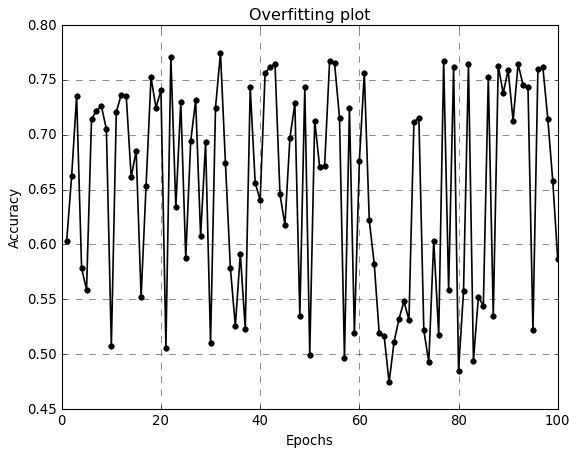

In [15]:
import matplotlib.pyplot as plt

perceptron = Perceptron(weights = np.zeros(8), bias = np.random.rand(), learning_rate = 0.01, epochs = 100)

historical_accuracies = perceptron.get_historical(X, y)

fig, ax = plt.subplots()

# Create a line plot
ax.plot([x for x in range(1, 101)], historical_accuracies, marker='o', markersize = 5, linestyle='-', color = 'black', linewidth = 1.5)

# stylize
plt.style.use('classic')
plt.grid(True, linestyle='--', alpha=0.8)

# Set the background color of the figure to white (or any other color you prefer)
fig.patch.set_facecolor('white')
# Set the background color of the axis to transparent
ax.set_facecolor('none')

# Adding labels and a title
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Overfitting plot')

# Show the plot
plt.show()

Need to get the axes labelling fixed

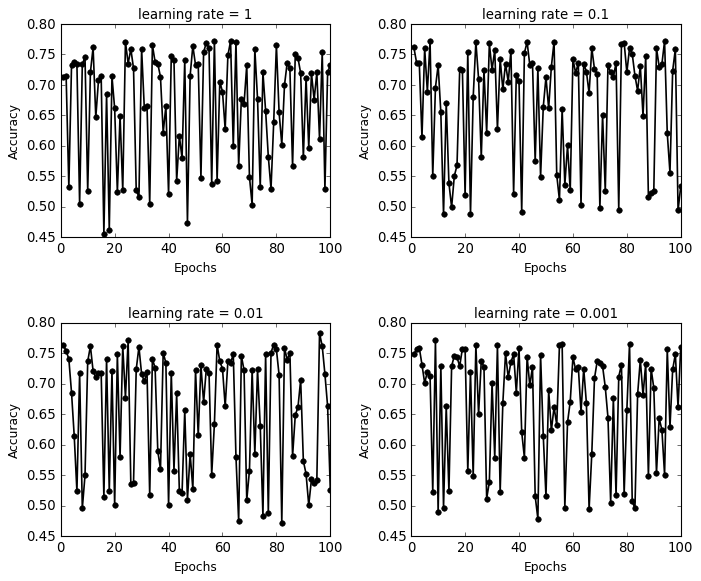

In [16]:
epochs = 100

fig, axs = plt.subplots(2, 2, figsize=(10, 8), facecolor='white')

plt.subplots_adjust(wspace=0.3, hspace=0.4)  # Adjust the values as needed


plt.subplot(2, 2, 1)
lr = 1
perceptron = Perceptron(learning_rate = lr)
historical_accuracies = perceptron.get_historical(X, y)
plt.plot([x for x in range(1, 101)], historical_accuracies, marker='o', markersize = 5, linestyle='-', color = 'black', linewidth = 1.5)  # 'o' for data points, '-' for line style
plt.title('learning rate = 1', fontsize = 12)


plt.subplot(2, 2, 2)
lr = 0.1
perceptron = Perceptron(learning_rate = lr)
historical_accuracies = perceptron.get_historical(X, y)
plt.plot([x for x in range(1, 101)], historical_accuracies, marker='o', markersize = 5, linestyle='-', color = 'black', linewidth = 1.5)  # 'o' for data points, '-' for line style
plt.title('learning rate = 0.1', fontsize = 12)

plt.subplot(2, 2, 3)
lr = 0.01
perceptron = Perceptron(learning_rate = lr)
historical_accuracies = perceptron.get_historical(X, y)
plt.plot([x for x in range(1, 101)], historical_accuracies, marker='o', markersize = 5, linestyle='-', color = 'black', linewidth = 1.5)  # 'o' for data points, '-' for line style
plt.title('learning rate = 0.01', fontsize = 12)

plt.subplot(2, 2, 4)
lr = 0.001
perceptron = Perceptron(learning_rate = lr)
historical_accuracies = perceptron.get_historical(X, y)
plt.plot([x for x in range(1, 101)], historical_accuracies, marker='o', markersize = 5, linestyle='-', color = 'black', linewidth = 1.5)  # 'o' for data points, '-' for line style
plt.title('learning rate = 0.001', fontsize = 12)

# stylize
for ax in axs.flat:
    ax.set_xlabel('Epochs', fontsize=11)  # Set X-axis label font size to 10
    ax.set_ylabel('Accuracy', fontsize=11)  # Set Y-axis label font size to 10

plt.savefig('Overfitting_exhibit.jpg')
plt.show()

### Batch Update implementation
The one above updates for each individual row. However, what happens if we perform a batch update? Are these equivalent?

By setting batch_size to the length of the entire training data set, we take a single update step after each epoch

In [ ]:
# By setting batch_size to the length of the
def Fit_Batch_Perceptron(batch_size, perceptron, train_X, train_y, learning_rate=0.01):
    
    for batch_start in range(0, X.shape[0], batch_size):
        X_batch = X[batch_start:batch_start+batch_size]
        y_batch = y[batch_start:batch_start+batch_size]
        
        for i in range(batch_size):   
            prediction = perceptron.predict(train_X[i])
            error += train_y[i] - prediction # error will always be 2 or -2
            
        perceptron.weights += learning_rate * error * train_X[i]
        perceptron.bias += learning_rate * error
        
    return

### Javen Fit Perceptron

Here we implement the algorithm from the slides for the sake of completeness.


Analyzing numerically, we see the only difference is that error is propagated as +1 / -1 , as opposed to the original implementation which propagates as +2 / -2.

In [ ]:
def Javen_Fit_Perceptron(perceptron, train_X, train_y, learning_rate=0.01):
    """
    if prediction (binary scalar) matches groundtruth label, then they have the same sign
    thus result should be +ve
    else prediction/groundtruth do not match and thus -ve
    """
    for i in range(len(train_X)):
        prediction = perceptron.predict(train_X[i])
        
        # if the labels do not match, meaning it's incorrect, then record as an erronerous instance
        indicator = 1 if train_y[i] * prediction < 0 else 0
        
        # multiply out the train_y with train_X, which gives the sign of the true label
        perceptron.weights += learning_rate * train_y[i] * train_X[i] * indicator
        
        # This is as follows from ESL Equation (4.43)
        perceptron.bias += learning_rate * error
    return

In [ ]:
class BatchPerceptron(Perceptron):
    def __init__(self, weights = np.zeros(8), bias = np.random.rand(), learning_rate = 0.01, epochs = 100):
        super().__init__()
        
    def batch_fit(self, X, y, batch_size=32):
        for epoch in range(epochs):
            for i in range(0, len(X), batch_size):
                prediction = self.predict(X[i])
                error = y[i] - prediction
                self.weights += self.learning_rate * error * X[i]
                self.bias += self.learning_rate * error

In [ ]:
# Run test to verify
import matplotlib.pyplot as plt

historical_accuracies = []

epochs = 100; lr = 0.01
model = BatchPerceptron(learning_rate = lr, epochs = epochs)

# Create a line plot
plt.plot([x for x in range(1, 101)], historical_accuracies, marker='o', linestyle='-')  # 'o' for data points, '-' for line style

# Adding labels and a title
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Using Lecture Slide update rule')

# Show the plot
plt.show()

#### Remarks on Javen's update rule

It is easy to see that the overall behavior is largely similar. The accuracy range is similar to the original implementation. The amount of fluctation is similar. Most importantly we observe the perceptron is unable to converge to the correct weights.

#### Sklearn perceptron
for benchmarking ONLY. (implementation undisclosed)

In [ ]:
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron

# tol is None because we know accuracy could fall from previous epoch to next epoch
clf = Perceptron(max_iter = 100, tol=None, eta0 = 0.1, random_state=0)
clf.fit(X, y)
clf.score(X, y)

### Train_val_test_split

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_test, X_val, y_test, y_val  = train_test_split(X_test, y_test, test_size=0.5, random_state=1)

X_train.shape, X_val.shape, X_test.shape

((607, 8), (76, 8), (76, 8))

In [21]:
class Perceptron2(Perceptron):
    def __init__(self, weights = np.zeros(8), bias = np.random.rand(), learning_rate = 0.01, epochs = 100):
        super().__init__()
    
    def best_fit(self, X, y, X_val, y_val):
        best_acc = -np.inf
        best_weights = self.weights
        best_bias = self.bias
        
        for epoch in range(self.epochs):
            for i in range(len(X)):
                prediction = self.predict(X[i])
                error = y[i] - prediction
                self.weights += self.learning_rate * error * X[i]
                self.bias += self.learning_rate * error
            
            y_val_pred = model.predict(X_val)
            acc = accuracy_score(y_val_pred, y_val)
            
            if acc > best_acc:
                best_acc = acc
                best_weights = self.weights
                best_bias = self.bias
        
        ## use best weights/bias
        self.weights = best_weights
        self.bias = best_bias
  
p2 = Perceptron2(weights = np.zeros(8), bias = np.random.rand(), learning_rate = 0.01, epochs = 100)
p2.best_fit(X_train, y_train, X_val, y_val)

predictions = p2.predict(X_test)
test_acc = accuracy_score(predictions, y_test)
print(test_acc)

0.7631578947368421


### K-fold CV

A single measurement is not accurate. To ensure fairness, we use 5-fold cross validation which ensures metrics are obtained on all combination splits of the dataset.

Since we will perform 5-fold CV on all model/pipelines, we can simply do train-test split.

In [87]:
from sklearn.model_selection import KFold

def CrossValidationTest(X, y, learning_rate, weights = np.zeros(8)):
    
    # init historical metric arrays
    acc_arr, p_arr, r_arr, f1_arr = [], [], [], []
    
    kf = KFold(n_splits=5)
    
    for train_index, val_index in kf.split(X):
        # print("TRAIN:", train_index, "VAL:", val_index)
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]
        
        p2 = Perceptron2(weights = weights, bias = np.random.rand(), learning_rate = learning_rate, epochs = 100)
        p2.best_fit(X_train, y_train, X_val, y_val)
        
        predictions = p2.predict(X_val)
        test_acc = accuracy_score(predictions, y_val)  # again, val <-> test here
        print(f'Test acc for learning rate {learning_rate}',test_acc)
        p, r, f1, _ = metric_eval(predictions, y_val)
        
        acc_arr.append(test_acc)
        p_arr.append(p)
        r_arr.append(r)
        f1_arr.append(f1)
        
    return acc_arr, p_arr, r_arr, f1_arr
        
acc_arr, p_arr, r_arr, f1_arr = CrossValidationTest(X, y, learning_rate = 1)

Test acc for learning rate 1 0.6973684210526315
Precision: 0.60
Recall: 0.91
F1-score: 0.72
Confusion Matrix:
[[46 40]
 [ 6 60]]
Test acc for learning rate 1 0.6513157894736842
Precision: 0.51
Recall: 0.83
F1-score: 0.63
Confusion Matrix:
[[54 44]
 [ 9 45]]
Test acc for learning rate 1 0.756578947368421
Precision: 0.74
Recall: 0.86
F1-score: 0.80
Confusion Matrix:
[[43 25]
 [12 72]]
Test acc for learning rate 1 0.7302631578947368
Precision: 0.66
Recall: 0.96
F1-score: 0.79
Confusion Matrix:
[[36 38]
 [ 3 75]]
Test acc for learning rate 1 0.7947019867549668
Precision: 0.88
Recall: 0.82
F1-score: 0.85
Confusion Matrix:
[[35 12]
 [19 85]]


In [71]:
results_df = pd.DataFrame(columns=['Acc', 'Precision', 'Recall', 'F1'])

In [72]:
acc_arr, p_arr, r_arr, f1_arr = CrossValidationTest(X, y, learning_rate = 1)
print('acc, precision, recall, f1')
print('lr = 1 : ', [np.mean(x) for x in [acc_arr, p_arr, r_arr, f1_arr] ] )

results_df.loc['0'] = [np.mean(x) for x in [acc_arr, p_arr, r_arr, f1_arr] ]

acc, precision, recall, f1
lr = 1 :  [0.6983443708609272, 0.6692109675878422, 0.8519826533739099, 0.7375577976700571]


In [73]:
acc_arr, p_arr, r_arr, f1_arr = CrossValidationTest(X, y, learning_rate = 0.1)
print('acc, precision, recall, f1')
print('lr = 0.1 : ', [np.mean(x) for x in [acc_arr, p_arr, r_arr, f1_arr]])

results_df.loc['0.1'] = [np.mean(x) for x in [acc_arr, p_arr, r_arr, f1_arr] ]

acc, precision, recall, f1
lr = 0.1 :  [0.6562652492157546, 0.6164034959493773, 0.8386256404146313, 0.6831701242023259]


In [74]:
acc_arr, p_arr, r_arr, f1_arr = CrossValidationTest(X, y, learning_rate = 0.01)
print('acc, precision, recall, f1')
print('lr = 0.01 : ', [np.mean(x) for x in [acc_arr, p_arr, r_arr, f1_arr]])

results_df.loc['0.01'] = [np.mean(x) for x in [acc_arr, p_arr, r_arr, f1_arr] ]

acc, precision, recall, f1
lr = 0.01 :  [0.7260108051585917, 0.7319084824746368, 0.8351811025643494, 0.772336788614961]


In [75]:
acc_arr, p_arr, r_arr, f1_arr = CrossValidationTest(X, y, learning_rate = 0.001)
print('acc, precision, recall, f1')
print('lr = 0.001 : ', [np.mean(x) for x in [acc_arr, p_arr, r_arr, f1_arr]])

results_df.loc['0.001'] = [np.mean(x) for x in [acc_arr, p_arr, r_arr, f1_arr] ]

acc, precision, recall, f1
lr = 0.001 :  [0.6865458347856397, 0.6024315771237964, 0.8855510410117386, 0.691681637076374]


In [76]:
results_df

,Acc,Precision,Recall,F1
0,0.698344,0.669211,0.851983,0.737558
0.1,0.656265,0.616403,0.838626,0.683170
0.01,0.726011,0.731908,0.835181,0.772337
0.001,0.686546,0.602432,0.885551,0.691682


From the best learning rate of 0.01 (by overall balance of metric performance), we perform additional analysis

weight initialization and bias initialization

### Weight initialization

We will use
* zero
* random (-0.5, 0.5)
* Xavier
* He

In [78]:
weights_df = pd.DataFrame(columns=['Acc', 'Precision', 'Recall', 'F1'])

In [81]:
input_size = 8  # Number of input features
output_size = 1  # Number of output units (for binary classification)

## random
random_weights = np.random.uniform(-0.5, 0.5, input_size)
acc_arr, p_arr, r_arr, f1_arr = CrossValidationTest(X, y, learning_rate = 0.01, weights = random_weights)
print('acc, precision, recall, f1')
print('Random Weights : ', [np.mean(x) for x in [acc_arr, p_arr, r_arr, f1_arr]])

## Xavier
limit = np.sqrt(6 / (input_size + output_size))
xavier_weights = np.random.uniform(-limit, limit, (input_size, output_size))
acc_arr, p_arr, r_arr, f1_arr = CrossValidationTest(X, y, learning_rate = 0.01, weights = xavier_weights)
print('acc, precision, recall, f1')
print('Xavier weights : ', [np.mean(x) for x in [acc_arr, p_arr, r_arr, f1_arr]])

## He
limit = np.sqrt(2 / input_size)
he_weights = np.random.uniform(-limit, limit, (input_size, output_size))
acc_arr, p_arr, r_arr, f1_arr = CrossValidationTest(X, y, learning_rate = 0.01, weights = he_weights)
print('acc, precision, recall, f1')
print('He weights : ', [np.mean(x) for x in [acc_arr, p_arr, r_arr, f1_arr]])

acc, precision, recall, f1
Random Weights :  [0.7233966538863715, 0.686331563695185, 0.8590258049003925, 0.7576508786106901]
acc, precision, recall, f1
Xavier weights :  [0.679923318229348, 0.6738597089374073, 0.8352519867161016, 0.7096287766852967]
acc, precision, recall, f1
He weights :  [0.7036162425932382, 0.68731335101263, 0.8468104679873616, 0.746691697480436]


We see similar performance by using either random weights or He weights for initialization, meaning it does not affect the original learning ability much. However using Xavier weight initialization is noticeably worse.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
model = Perceptron(learning_rate = 0.01, epochs = 200)
model.fit(X_train, y_train)
scores = cross_val_score(model, X_test, y_test, cv=kf, scoring='accuracy')
print(scores)
print("mean", np.mean(scores))
print("Std", np.std(scores))